https://analyticsjobs.in/careers/top-30-companies-in-india-to-work-for-in-data-science-and-machine-learning/

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

#filtering reshape warnings deprecation
warnings.filterwarnings('ignore')

In [12]:
#Importing Data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
#all numeric
data.info()
#Converting to float
data=data.astype(float)
#No missing values
data.describe()
data.dtypes
m = data.shape[0]
n = data.shape[1]
data_x = data.iloc[:,0:(n-1)]
data_y = data.iloc[:,-1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
#checking for correlation with dependent variable
data_x.corrwith(data_y)

#checking for multicollinearity
data_x.corr()   # no variables with correalation greater than 0.85, no issue of multicollinearity


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


Text(0, 0.5, 'Wine Quality')

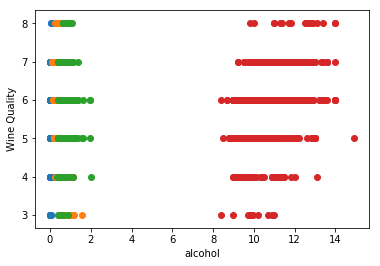

In [14]:
#plotting correalated variable scatter plots for visualizing 
plt.scatter(data_x['citric acid'],data_y)
plt.xlabel('fixed acidity')
plt.ylabel('Wine Quality')

plt.scatter(data_x['volatile acidity'],data_y)
plt.xlabel('volatile acidity')
plt.ylabel('Wine Quality')

plt.scatter(data_x['sulphates'],data_y)
plt.xlabel('sulphates')
plt.ylabel('Wine Quality')

plt.scatter(data_x['alcohol'],data_y)
plt.xlabel('alcohol')
plt.ylabel('Wine Quality')

In [15]:
#Train test split for validating model
trainx, testx, trainy, testy = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

In [16]:
#Data columns are at different scale,apply this function to normalize before appling gradient descent optim 
def normalize_and_stackintercept(trainx,testx):
    traindatax=trainx
    testdatax=testx
    mu= traindatax.mean(axis=0)
    sigma= traindatax.std(axis=0)
    traindatax= (traindatax-mu)/sigma
    traindatax = np.array(traindatax)    
    traindatax=np.hstack([np.ones((traindatax.shape[0],1)),traindatax])
    testdatax = (testdatax-mu)/sigma
    testdatax = np.array(testdatax)    
    testdatax=np.hstack([np.ones((testdatax.shape[0],1)),testdatax])    
    return traindatax,testdatax

In [17]:
#normalizing train and test and stacking ones for intercept term
trainx,testx=normalize_and_stackintercept(trainx,testx)

In [18]:
#Running Gradient Descent optimization
def Gradient_Descent(trainx,trainy,testx,testy,lr=0.05,reg=0,iters=1000):
    train_m = trainx.shape[0]
    test_m = testx.shape[0]
    n = trainx.shape[1]
    coeff= np.zeros((n,1))
    lr=lr
    reg=reg
    train_Loss=[]
    test_Loss=[]
    
    for iterations in range(iters):        
        train_prediction= np.dot(trainx,coeff)
        train_error = train_prediction-trainy.reshape(train_m,1)
        test_prediction= np.dot(testx,coeff)
        test_error = test_prediction-testy.reshape(test_m,1) 
        train_loss= np.sum(np.square(train_error))/(2*train_m) +0.5*reg*np.sum(coeff**2)/train_m
        test_loss=  np.sum(np.square(test_error))/(2*test_m) +0.5*reg*np.sum(coeff**2)/test_m
        print("iteration "+str(iterations)+"train_cost: "+str(train_loss) +" test_cost: "+str(test_loss))
        train_Loss.append(train_loss)
        test_Loss.append(test_loss) 
        gradient=np.dot(train_error.T,trainx)/train_m + (reg*coeff/train_m).T
        coeff= coeff-lr*(gradient.T)
        
    Loss_dict=pd.DataFrame({'train_Loss':train_Loss,'test_Loss':test_Loss})
    
    return coeff,Loss_dict

iteration 0train_cost: 16.132707774798927 test_cost: 16.384375
iteration 1train_cost: 14.573180730690513 test_cost: 14.796391150771838
iteration 2train_cost: 13.167034509218418 test_cost: 13.365429658558366
iteration 3train_cost: 11.899070075933652 test_cost: 12.075791906884373
iteration 4train_cost: 10.755616625068805 test_cost: 10.913378240045777
iteration 5train_cost: 9.72437340572836 test_cost: 9.86551959247378
iteration 6train_cost: 8.794268884205952 test_cost: 8.920827949055536
iteration 7train_cost: 7.955335129073637 test_cost: 8.069063298897408
iteration 8train_cost: 7.1985956106899085 test_cost: 7.301015084846562
iteration 9train_cost: 6.515964857695739 test_cost: 6.608396431110917
iteration 10train_cost: 5.900158621424451 test_cost: 5.983749664073895
iteration 11train_cost: 5.344613373681682 test_cost: 5.420361836449221
iteration 12train_cost: 4.843414110739682 test_cost: 4.912189129606635
iteration 13train_cost: 4.391229561787163 test_cost: 4.4537891489107
iteration 14train_

iteration 641train_cost: 0.2103960736865567 test_cost: 0.20559787614559732
iteration 642train_cost: 0.21039605614776305 test_cost: 0.2055979507446357
iteration 643train_cost: 0.2103960387222652 test_cost: 0.2055980249739455
iteration 644train_cost: 0.21039602140930638 test_cost: 0.20559809883602084
iteration 645train_cost: 0.21039600420813523 test_cost: 0.20559817233333536
iteration 646train_cost: 0.21039598711800608 test_cost: 0.20559824546834224
iteration 647train_cost: 0.21039597013817854 test_cost: 0.20559831824347466
iteration 648train_cost: 0.21039595326791757 test_cost: 0.20559839066114585
iteration 649train_cost: 0.2103959365064934 test_cost: 0.20559846272374915
iteration 650train_cost: 0.21039591985318162 test_cost: 0.20559853443365841
iteration 651train_cost: 0.21039590330726288 test_cost: 0.2055986057932279
iteration 652train_cost: 0.2103958868680232 test_cost: 0.20559867680479282
iteration 653train_cost: 0.2103958705347535 test_cost: 0.20559874747066903
iteration 654train_c

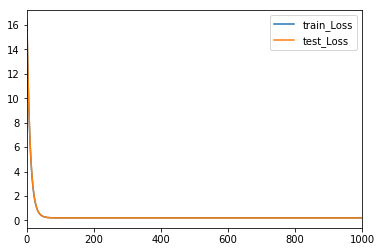

In [23]:
coeff,loss_dict = Gradient_Descent(trainx,trainy.values,testx,testy.values,lr=0.05,reg=0)
loss_dict.plot()

In [24]:
def predict(data,coeff):
    pred=np.dot(data,coeff)
    return pred

In [27]:
#predicting on training and testset
train_prediction= predict(trainx,coeff)
test_prediction= predict(testx,coeff)

In [28]:
print(coeff)

[[ 5.62198391]
 [ 0.04210292]
 [-0.20016283]
 [-0.04866372]
 [ 0.01164545]
 [-0.07876391]
 [ 0.0465781 ]
 [-0.10763289]
 [-0.02787688]
 [-0.04813222]
 [ 0.14023889]
 [ 0.30848849]]


In [29]:
def rsquared(y,y_hat):
    sst = np.sum((y-np.mean(y))**2)
    ssr = np.sum((y-y_hat.reshape(y_hat.shape[0],))**2)
    score = 1-(ssr/sst)
    return score

In [33]:
#Calculating Rsquared value for training and test set
train_score=rsquared(trainy,train_prediction)    
test_score=rsquared(testy,test_prediction)    

In [34]:
def compute_pvalue(trainx,trainy,prerdiction):
    train_m=trainx.shape[0]
    residuals= trainy.reshape(train_m,1)-train_prediction
    mse= np.sum(np.square(residuals))/(trainx.shape[0]-trainx.shape[1])
    stderror=np.sqrt( mse*np.diag(np.linalg.inv(np.dot(trainx.T,trainx))))
    tstatistic= coeff/stderror.reshape(n,1)
    df=trainx.shape[0]-trainx.shape[1]
    pvalue=[2*(1-stats.t.cdf(tstat,df)) if tstat>0 else 2*stats.t.cdf(tstat,df) for tstat in tstatistic]
    return pvalue,tstatistic

pvalue,_ = compute_pvalue(trainx,trainy.values,train_prediction)
#important features
(pd.Series(pvalue) < 0.05)[1:]

1     False
2      True
3     False
4     False
5      True
6     False
7      True
8     False
9     False
10     True
11     True
dtype: bool

In [35]:
important_features=data_x.columns[(pd.Series(pvalue) < 0.05)[1:]]

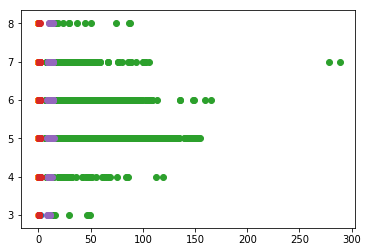

In [36]:
#Using only these features give comparable accuracy
#We observe most of variables with high correalation have less pvalue as well
#plotting important variables

plt.scatter(data['volatile acidity'],data_y)
plt.scatter(data['chlorides'],data_y)
plt.scatter(data['total sulfur dioxide'],data_y)
plt.scatter(data['sulphates'],data_y)
plt.scatter(data['alcohol'],data_y)

In [39]:
#Alternative method
def SolveNormalEquation(trainx,trainy):    
    return np.dot(np.linalg.inv(np.dot(trainx.T,trainx)),np.dot(trainx.T,trainy))

NormalEqcoeff=SolveNormalEquation(trainx,trainy)

In [40]:
NormalEqcoeff

array([ 5.62198391,  0.04022601, -0.2001546 , -0.04845448,  0.01104757,
       -0.07889806,  0.0467472 , -0.10782819, -0.02620485, -0.0491577 ,
        0.14000254,  0.309438  ])